In [13]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import eigs

edges_file = open('wisconsin_edges.csv', "r")
nodes_file = open('wisconsin_nodes.csv', "r")

# create a dictionary where nodes_dict[i] = name of wikipedia page
nodes_dict = {}
for line in nodes_file:
    nodes_dict[int(line.split(',',1)[0].strip())] = line.split(',',1)[1].strip()

node_count = len(nodes_dict)

# create adjacency matrix
A = np.zeros((node_count, node_count))
for line in edges_file:
    from_node = int(line.split(',')[0].strip())
    to_node = int(line.split(',')[1].strip())
    A[to_node, from_node] = 1.0

## Add code below to (1) prevent traps and (2) find the most important pages     
# Hint -- instead of computing the entire eigen-decomposition of a matrix X using
# s, E = np.linalg.eig(A)
# you can compute just the first eigenvector with:
# s, E = eigs(csc_matrix(A), k = 1)

# (1) Prevent traps by adding .001 to each entry of A
A = A + .001

# normalize each row of A
A = A / np.sum(A, axis=0)

# (2) Find the most important pages
s, E = eigs(csc_matrix(A), k = 1)
ranked_pages = np.squeeze(np.argsort(E, axis=0)[::-1])
print("Page ranked first: " + nodes_dict[ranked_pages[0]])
print("Page ranked third: " + nodes_dict[ranked_pages[2]])

Page ranked first: "Wisconsin"
Page ranked third: "Madison, Wisconsin"


### 2 a)

For a binary linear classifier, the logistic loss function does not suffer from the same problem as the squared error loss on easy to classify points because adding 1 to the loss functions ensures that the loss is always positive. $yx^Tw$ is positive when the prediction and the label are the same sign and If the prediction and the label are different signs, then $yx^Tw$ is negative.

### 2 b)

$\dfrac{d}{dw}(\min_w\sum_{i=1}^{n}\log(1+e^{-yx^Tw})+\lambda||w||_2^2)$

$\dfrac{e^{-yx^Tw}-y_ix_i^T}{\ln(1+e^{-yx^Tw})} + 2\lambda w$



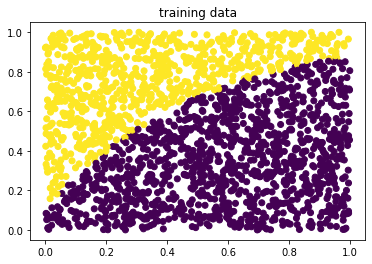

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)

n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

In [20]:
# c
def gradient_descent(x, y, it, tau, l1):
    w = np.array([[0],[0]])
    W = np.zeros((it, w.shape[0]))

    for i in range(it):
        g = 0
        for j in range(x_train.shape[0]):
            xi = np.expand_dims(x_train[j, :], 1)
            yi = np.expand_dims(y_train[j], 1)

            g += (-yi @ xi.T * np.exp(-yi @ xi.T @ w)) / (1 + np.exp(-yi @ xi.T @ w))

        g += 2 * l1 * w.T
        g /= np.linalg.norm(g, ord=2)
        w = w - tau * g.T
        W[i] = np.squeeze(w)
    return W


In [21]:
# d
it = 50
tau = 2
l1 = 1

W = gradient_descent(x_train, y_train, it, tau, l1)
w_leastsquares = np.squeeze(np.linalg.inv(x_train.T@x_train)@x_train.T@y_train)
w_gradient = W[-1]
y_gradient = np.sign(x_train@np.expand_dims(w_gradient, 1))
y_leastsquares = np.sign(x_train@np.expand_dims(w_leastsquares,1))
gradient_error = np.count_nonzero(y_train-y_gradient) / y_train.shape[0]
leastsquares_error = np.count_nonzero(y_train-y_leastsquares) / y_train.shape[0]
print("Gradient error rate: " + str(gradient_error))
print("Least squares error rate: " + str(leastsquares_error))

Gradient error rate: 0.1385
Least squares error rate: 0.114


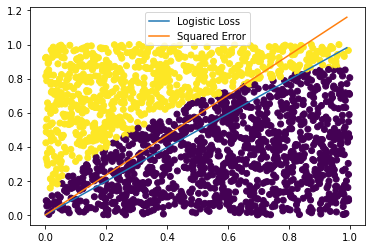

In [22]:
# e
x_val = np.arange(0, 1, 0.01)
x_log = -w_gradient[0]/w_gradient[1] * x_val
x_least = -w_leastsquares[0]/w_leastsquares[1] * x_val

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.plot(x_val, x_log, label = 'Logistic Loss')
plt.plot(x_val, x_least, label = 'Squared Error')
plt.legend()
plt.show()

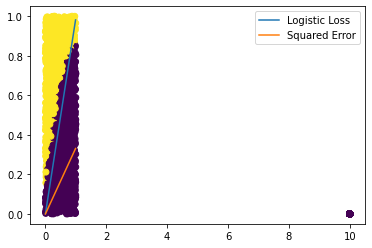

Gradient error rate: 0.1385
Least squares error rate: 0.451


In [23]:
# f
y_add = -1 * np.ones((1000,1))
y_new = np.vstack((y_train, y_add))

x_add = np.hstack((10 * np.ones((1000,1)), np.zeros((1000,1))))
x_new = np.vstack((x_train, x_add))

it = 50
tau = 2
l1 = 1

W = gradient_descent(x_new, y_new, it, tau, l1)

w_leastsquares = np.squeeze(np.linalg.inv(x_new.T@x_new)@x_new.T@y_new)
w_gradient = W[-1]

x_val = np.arange(0, 1, 0.01)
x_log = -w_gradient[0]/w_gradient[1] * x_val
x_least = -w_leastsquares[0]/w_leastsquares[1] * x_val

plt.scatter(x_new[:,0],x_new[:,1], c=y_new[:,0])
plt.plot(x_val, x_log, label = 'Logistic Loss')
plt.plot(x_val, x_least, label = 'Squared Error')
plt.legend()
plt.show()


y_gradient = np.sign(x_train@np.expand_dims(w_gradient, 1))
y_leastsquares = np.sign(x_train@np.expand_dims(w_leastsquares,1))
gradient_error = np.count_nonzero(y_train-y_gradient) / y_train.shape[0]
leastsquares_error = np.count_nonzero(y_train-y_leastsquares) / y_train.shape[0]
print("Gradient error rate: " + str(gradient_error))
print("Least squares error rate: " + str(leastsquares_error))

The logistic error decreases with easy to classify points while the squared error loss increases with easy to classify points.